# Exemple d'escalament de dades. Una planta embotelladora

En una planta embotelladora tenim dues màquines que emplenen botelles, en principi amb 1000 ml de líquid, però amb un comportament (desviació) diferent.

In [1]:
# Importació de les llibreries

# Per al tractament de dades
import numpy as np
import pandas as pd

# Per als gràfics

import matplotlib.pyplot as plt

# I per al preprocessament
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Ara creem el conjunt de dades

# Definim mitjanes i desviacions per a cada embotelladora
muA, sigmaA = 1000, 1 # mitjana i desviació estàndard de l'embotelladora A
muB, sigmaB = 1000, 4 # mitjana i desviació estàndard de l'embotelladora B

# Creem les dues distribucions normals amb 1000 mostres
dadesA = np.random.normal(muA, sigmaA, 1000)
dadesB = np.random.normal(muB, sigmaB, 1000)

# Les juntem en columnes i creem un Dataframe
dades=np.column_stack((dadesA, dadesB))
Data = pd.DataFrame(dades, columns=['Embotelladora_A', 'Embotelladora_B'])

Una vegada tenim les dades de 1000 mostres de cada embotelladora, anem a veure com es distribueixen aquestes mitjançant un histograma. Representarem en l'eix de les X la quantitat exacta de mililitres, i en el de les Y la quantitat de botelles que han omplit cada quantitat.

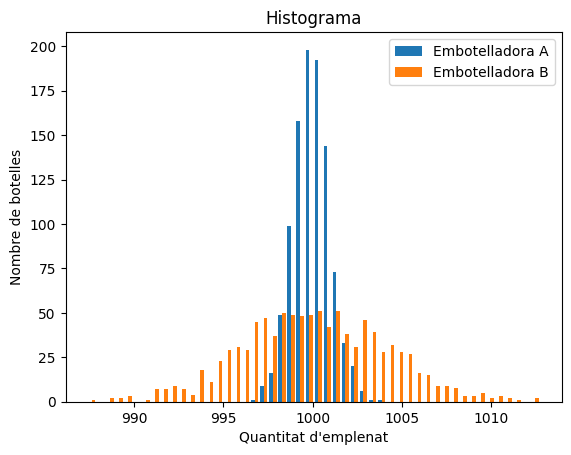

In [3]:
plt.hist(Data, 50) # Afegim a l'histograma el Dataframe i fem 50 bins (particions)
plt.ylabel('Nombre de botelles')
plt.xlabel('Quantitat d\'emplenat')
plt.legend(['Embotelladora A','Embotelladora B'])
plt.title('Histograma')
plt.show()

Com podem veure a simple vista, ambdues embotelladores segueixen una distribució normal, però la primera presenta una menor dispersió, el que implica que el volum de les botelles que emplena es troben més propers a la mitjana, mentre que en la segona es troben més escampats.

Comprovem-ho també numèricament amb la descripció del DataFrame:

In [4]:
pd.DataFrame(Data).describe()

,Embotelladora_A,Embotelladora_B
count,1000.000000,1000.000000
mean,1000.019748,999.918154
std,1.016416,4.028452
min,996.894200,988.771244
25%,999.367722,997.172596
50%,1000.000607,1000.154493
75%,1000.663577,1002.633890
max,1004.278811,1014.266305


Com veiem, ambdues embotelladores tenen aproximadament la mateixa mitjana, però l'embotelladora B té una desviació estàndard considerablement superior. També podem comprovar altres mesures com el rang, que és superior en l'embotelladora B que en la A.

## Escalat

Anem a procedir ara a escalar les dades.

En principi, aquest escalat no va a aportar-nos res a l'anàlisi, però ens servirà per veure com aplicar aquest procediment i homogeneïtzar les dades.

In [4]:
# Escalat

# Seleccionem les columnes numèriques a les que aplicar l'escalament
# que seran aquelles amb tipus float o int.
# Per a això fem ús del mètode select_dtypes del DataFrame
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()

# Definim la transformació StandardScaler
# primer la tupla amb l'operació que anem a fer
transformer_SS=[('scale', StandardScaler(), numeric_cols)]

# I ara el preprocessador. Incloem el remainder='passthrough' per a que
# no elimine les columnes on no s'aplica la transformació
preprocessor_SS = ColumnTransformer(transformer_SS,remainder='passthrough')

# Definim la transformació MinMaxScaler
# Definim la tupla amb l'operació
transformer_MM=[('scale', MinMaxScaler(), numeric_cols)]
preprocessor_MM = ColumnTransformer(
              transformer_MM,remainder='passthrough')

# I ara apliquem els dos escalats, cadascun per una banda
Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_MM = preprocessor_MM.fit_transform(Data)

## Representació de les dades

### Representació amb l'escalat estàndard

Representem ara les dades escalades amb l'escalat estàndard.

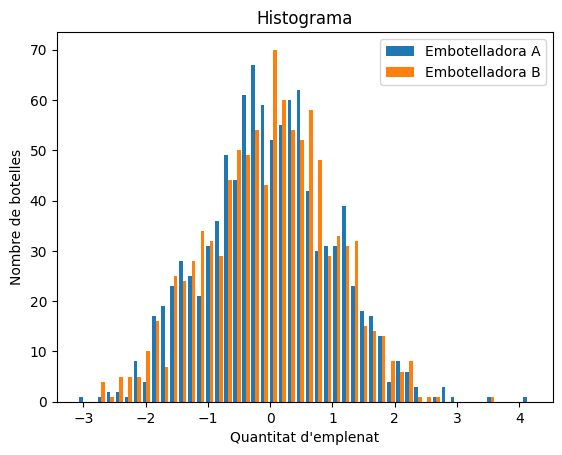

In [6]:
# Representació de l'StandadScaler

plt.hist(Data_prep_SS, 50)
plt.ylabel('Nombre de botelles')
plt.xlabel('Quantitat d\'emplenat')
plt.legend(['Embotelladora A','Embotelladora B'])
plt.title('Histograma')
plt.show()

Veiem la informació descriptiva de les dades:

In [7]:
pd.DataFrame(Data_prep_SS).describe()

,0,1
count,1.000000e+03,1.000000e+03
mean,9.872414e-13,-4.391065e-14
std,1.000500e+00,1.000500e+00
min,-3.076606e+00,-2.768430e+00
25%,-6.418154e-01,-6.818826e-01
50%,-1.884130e-02,5.869686e-02
75%,6.337473e-01,6.744763e-01
max,4.192372e+00,3.563486e+00


Com podem veure, ara ambudes variables estan normalitzades i tenen pràcticament la mateixa mitjana (observeu que les quantitats estan elevades a -12 i -14, pel que són pràcticament 0), i la desviació típica és propera a 1 en ambdós casos.

### Representació amb Min Max Scaler

Veiem ara la representació de les dades amb MinMaxScaler.

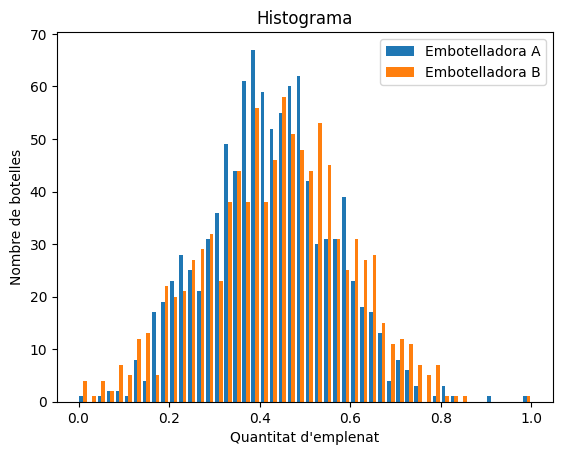

In [8]:

plt.hist(Data_prep_MM, 50)
plt.ylabel('Nombre de botelles')
plt.xlabel('Quantitat d\'emplenat')
plt.legend(['Embotelladora A','Embotelladora B'])
plt.title('Histograma')
plt.show()

Veiem la informació descriptiva de les dades:

In [9]:
pd.DataFrame(Data_prep_MM).describe()

,0,1
count,1000.000000,1000.000000
mean,0.423252,0.437218
std,0.137640,0.158009
min,0.000000,0.000000
25%,0.334956,0.329529
50%,0.420660,0.446488
75%,0.510437,0.543738
max,1.000000,1.000000


Com s'intueix a la gràfica i tal i com podem comprovar a les dades descriptives, ara ambdues variables posseeixen el mateix rang, que va de 0 a 1.

## Procediment alternatiu

Anem a veure com abordariem la normalització fent ús directament del mètode `fit_transform`.

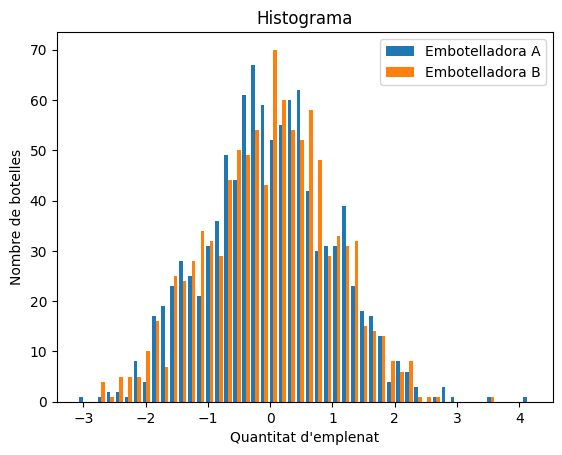

Escala:  [1.01590796 4.02643733]
Mitjana:  [1000.01974786  999.91815398]
Nombre de mostres: 1000
Variança:  [ 1.03206897 16.21219757]
Desviació:  [1.01590796 4.02643733]


In [14]:
# Creem una instància de StandardScaler
escala=StandardScaler()

# Creem el conjunt de dades escalat a partir de les originals, fent ús de fit_transform.
dades_standard_scaler = escala.fit_transform(Data)

# I ara ja podem dibuixar l'histograma.
plt.hist(dades_standard_scaler, 50)
plt.ylabel
plt.ylabel('Nombre de botelles')
plt.xlabel('Quantitat d\'emplenat')
plt.legend(['Embotelladora A','Embotelladora B'])
plt.title('Histograma')
plt.show()

# I mostrem les dades descriptives

# Per a cada característica anem a mostrar l'escala relativa a les dades, que
# s'ha aplicat per obtenir una mitjana de 0 i una variança d'1.
print("Escala: ",escala.scale_) # Escala
print("Mitjana: ",escala.mean_) # Valor mig de cada característica
print("Nombre de mostres:", escala.n_samples_seen_) # Nombre de mostres processades
print("Variança: ",escala.var_) # Variança de cda característica

print("Desviació: ",np.sqrt(escala.var_)) # Variança de cda característica


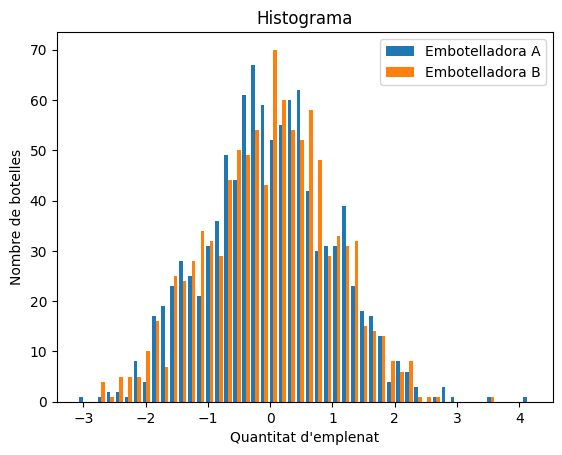

Escala:  [0.13541673 0.03922328]
Ajust per al mínim per característica:  [-134.99615373  -38.78285422]
Valor mínm:  [996.89419959 988.77124422]
Valor màxim:  [1004.27881147 1014.26630548]
Nombre de mostres:  1000
Per rang de característiques:  [ 7.38461187 25.49506126]


In [15]:
# Ara anem a fer el mateix amb MinMaxScaler

# Definim la classe
escala=MinMaxScaler()

# Creem el nou conjunt de dades escalades amb fit_transform
dades_maxmin_scaler=escala.fit_transform(Data)

# I bibuixem l'histograma
plt.hist(dades_standard_scaler, 50) 
plt.ylabel('Nombre de botelles')
plt.xlabel('Quantitat d\'emplenat')
plt.legend(['Embotelladora A','Embotelladora B'])
plt.title('Histograma')
plt.show()

# I mostrem les dades descriptives

print("Escala: ",escala.scale_) # Escalat. Equival a min - X.min(axis=0) * self.scale_
print("Ajust per al mínim per característica: ",escala.min_) # Ajust per característica para al mínim. Equivalent a (max - min) / (X.max(axis=0) - X.min(axis=0)) 
print("Valor mínm: ",escala.data_min_) # Valor mínim de cada característica
print("Valor màxim: ",escala.data_max_) # Valor màxim de cada característica
print("Nombre de mostres: ",escala.n_samples_seen_) # Nombrede mostres processades
print("Per rang de característiques: ",escala.data_range_) # Per rango de característiques (data_max_ - data_min_) vist a les dades
